In [1]:
import numpy as np
from numpy import linalg
import scipy as sp
import math
from scipy.integrate import odeint
#from matplotlib import animation, rc
from IPython.display import HTML

import plotly.graph_objects as go
from sympy import *

In [2]:
class mugas_vibration_functions:
  
    def __init__(self): 
        self=[];

    def dynamicSystemModel(self, X, t, A, B, cParameters):
        dXdt=A @ X + B * self.controlFn(t, cParameters);
        self.X=X;
        return dXdt

    def controlFn(self, t, cParameters):
        return cParameters[0]*np.cos(cParameters[1] * t)

    def simulateDySystem(self, Tmax, dT, X0, A,B, cParameters, xLabel, yLabel):
        t = np.linspace(0, Tmax, int(Tmax/dT+1))
        sol = odeint(self.dynamicSystemModel, X0, t, args=(A, B, cParameters));
        self.soln=sol;
        fig = go.Figure()
        [nt,nS]=sol.shape;

        # Add traces
        for nn in range(nS):
            fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
            fig.update_layout(xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
        
        fig.show()
        return [t,sol,fig] 
    
    def animate_particle_motion(self, XX, axisRange, figTitle):
        xx=[jj[0] for jj in XX]
        yy=[jj[1] for jj in XX]
        zz=[jj[2] for jj in XX]

        fig = go.Figure(
            data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                            mode="markers",
                            marker=dict(color="red", size=10)),
                go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                            mode="lines",
                            line=dict(color="blue", width=2))],
            layout=go.Layout(
                scene = dict(
                            xaxis=dict(range=axisRange[0], autorange=False),
                            yaxis=dict(range=axisRange[1], autorange=False),
                            zaxis=dict(range=axisRange[2], autorange=False),
                            aspectratio=dict(x=1, y=1, z=1),
                ),
                title_text=figTitle, hovermode="closest",
                updatemenus=[dict(type="buttons",
                                buttons=[dict(label="Play",
                                                method="animate",
                                                args=[None])])]),
            frames=[go.Frame(
                data=[go.Scatter3d(
                    x=[p[0]],
                    y=[p[1]],
                    z=[p[2]],
                    name='Particle',
                    mode="markers",
                    marker=dict(color="red", size=10))])

                for p in XX]
        )

        fig.show()
        return fig

    def animate_2D_scatter_plot(self, x, YY, xlabel, ylabel, title):
        fig = go.Figure(data=[go.Scatter(x=x,y=YY[0,:])],
                layout=go.Layout(
                    xaxis={'title':xlabel},
                    yaxis={'title':ylabel,'range':[1.1*YY.min(),1.1*YY.max()]},
                    title={'text':title,'y':0.9,'x':0.5, 'xanchor': 'center','yanchor': 'top'},
                    scene = dict(aspectratio=dict(x=1, y=1)),    
                    hovermode="closest",
                    updatemenus=[dict(type="buttons",
                                    buttons=[dict(label="Play",
                                                    method="animate",
                                                    args=[None])])]
                    ),
            frames=[go.Frame(data=[go.Scatter(x=x,y=y)]) for y in YY]
        )

        #fig.show()
        return fig

In [3]:
mv=mugas_vibration_functions()

#Q - Flow Induced Resonance: Group Rankine-FI#

Flow-Induced Resonance (FIR) is a phenomenon where the interaction between fluid flow and a structure leads to vibration at a frequency that is related to the frequency of the fluid flow. FIR is a crucial factor in the design and safety of structures such as bridges, buildings, offshore platforms, and aircraft.

The vibration induced by FIR can cause significant damage or failure of structures, making it a critical consideration for engineers. The natural frequency of an object is a key factor in determining its susceptibility to FIR. When the frequency of the fluid flow matches the natural frequency of the object, the amplitude of vibration can increase rapidly, leading to potential damage.

To prevent FIR, engineers can modify the design of structures to avoid natural frequencies that are likely to match the frequency of the fluid flow. These modifications can include changes to the shape and mass distribution of the structure, as well as adding dampers or other devices to absorb or dissipate the energy of the vibrations.

Numerical simulations and experimental studies are also crucial in identifying potential sources of FIR and developing mitigation strategies. For instance, in the case of offshore platforms, studies have shown that the presence of vortex-induced vibrations (VIV) can lead to FIR. To mitigate this, engineers have developed various solutions, including the use of helical strakes, which disrupt the formation of vortices.

In the design of aircraft, FIR is a critical factor in the stability and safety of the aircraft. Engineers use computational fluid dynamics (CFD) simulations to model the interaction between the fluid flow and the aircraft structure. These simulations help identify potential sources of FIR and enable engineers to develop solutions to prevent it.

In summary, FIR is a phenomenon that can have significant consequences on the safety and reliability of structures. By understanding the underlying principles and employing mitigation strategies, engineers can ensure that structures are designed to withstand the effects of FIR.





Flow-induced resonance (FIR) is a phenomenon that can cause significant damage or failure of structures when fluid flow passing over an object induces vibration at the same frequency as the natural frequency of the object. In the field of engineering, understanding the equations related to vibration is crucial for preventing FIR and ensuring the safety and reliability of structures.

The natural frequency equation relates the natural frequency of an object to its physical properties, such as its mass, stiffness, and damping coefficient. In the case of FIR, modifying the shape and design of structures can affect their natural frequency and prevent resonance from occurring.

The damping equation describes the damping force that opposes the motion of a vibrating object. Adding dampers or other devices to absorb or dissipate the energy of the vibrations can help prevent FIR.

The forced vibration equation describes the motion of an object subjected to an external force, such as the fluid flow in the case of FIR. In engineering, numerical simulations and experimental studies can be performed to identify the external forces acting on a structure and develop mitigation strategies.

The resonance frequency equation describes the frequency at which resonance occurs between an object and an external force. In the case of FIR, this frequency is the same as the natural frequency of the object. Engineers use computational fluid dynamics simulations to model the interaction between fluid flow and structures and identify potential sources of FIR.

For instance, in the design of offshore platforms, the presence of vortex-induced vibrations (VIV) can lead to FIR. Engineers have developed solutions such as helical strakes to disrupt the formation of vortices and prevent VIV-induced FIR.

In summary, the equations related to vibration play a critical role in preventing FIR and ensuring the safety and reliability of structures. Through modifications to the design and shape of structures, the addition of dampers, and the use of numerical simulations and experimental studies, engineers can identify potential sources of FIR and develop mitigation strategies.

Vortex shedding frequency:

In many cases, the frequency of fluid flow passing over an object and inducing vibrations is related to the phenomenon of vortex shedding. Vortex shedding is the alternating formation and shedding of vortices as fluid flows past an object. The frequency of vortex shedding can be calculated using the Strouhal number:

$St = \frac{f D}{V}$

where $St$ is the Strouhal number, $f$ is the frequency of vortex shedding, $D$ is the characteristic dimension of the object (such as its width), and $V$ is the velocity of the fluid flow.

The frequency of vibration induced by vortex shedding can be estimated by assuming that the natural frequency of the object is close to the frequency of vortex shedding:

$f_{induced} = k f_{vortex}$

where $f_{induced}$ is the frequency of vibration induced by the fluid flow, $f_{vortex}$ is the frequency of vortex shedding, and $k$ is a constant that depends on the specific geometry of the object.

Von Karman vortex street:

In some cases, the fluid flow passing over an object can induce a Von Karman vortex street, which is a repeating pattern of vortices that can lead to significant vibration and potential FIR. The frequency of Von Karman vortex shedding can be calculated using the Strouhal number, as described above.

The amplitude of vibration induced by Von Karman vortex shedding can be estimated using the following equation:

$A = C_d \frac{\rho V^2 D^2}{2 \pi^2 f_n^2 m}$

where $A$ is the amplitude of vibration, $C_d$ is the drag coefficient of the object, $\rho$ is the density of the fluid, $V$ is the velocity of the fluid flow, $D$ is the characteristic dimension of the object, $f_n$ is the natural frequency of the object, and $m$ is its mass.

Flutter speed:

Flutter is a type of FIR that occurs when the natural frequency of a structure is close to the frequency of the fluid flow passing over it. Flutter can lead to large-amplitude vibrations and potentially catastrophic failure. The flutter speed is the speed at which flutter occurs. It can be estimated using the following equation:

$U_f = \frac{f_n}{k_a D}$

where $U_f$ is the flutter speed, $f_n$ is the natural frequency of the structure, $k_a$ is the aerodynamic stiffness coefficient, and $D$ is the characteristic dimension of the structure.

In summary, these additional equations and calculations can help engineers better understand and mitigate the risk of FIR in structures subjected to fluid flow. By using these equations and other tools such as numerical simulations and experimental testing, engineers can develop effective strategies to prevent FIR and ensure the safety and reliability of structures.

#04. 

Provide at least two soultions that will allow you to safely operate at frequencies near the second mode of resonance of the system. Justify your answer using simulations and compare the pros and cons of the two solutions.

There are several possible solutions that can be used to safely operate at frequencies near the second mode of resonance of a system. Here are two options:

Damping: Adding damping to the system can reduce the amplitude of vibrations at resonance and prevent damage to the structure. This can be achieved by adding dampers, such as viscoelastic materials or tuned mass dampers, to the system. These dampers can absorb energy from the vibrations and dissipate it as heat.
To demonstrate the effectiveness of damping, we can use a simulation to model a structure subjected to a harmonic load at the second mode of resonance. We can compare the response of the structure with and without damping to see the effect of damping on the amplitude of vibrations.

Pros: Damping is a simple and effective solution that can be applied to many different types of structures. It does not require any changes to the design or construction of the structure.

Cons: Damping can add weight and complexity to the structure, which may increase costs and reduce efficiency. In addition, the effectiveness of damping may decrease over time due to material degradation or other factors.

Structural Modifications: Modifying the structure can change its natural frequency and shift it away from the frequency of the excitation source. This can be achieved by adding mass or stiffness to the structure at specific locations.
To demonstrate the effectiveness of structural modifications, we can use a simulation to model a structure with modified stiffness or mass properties. We can compare the response of the modified structure with the original structure to see the effect of the modifications on the natural frequency.

Pros: Structural modifications can be highly effective in shifting the natural frequency of the structure away from the frequency of the excitation source. This can be a permanent solution that does not require ongoing maintenance or additional costs.

Cons: Structural modifications can be complex and expensive, and may require significant changes to the design or construction of the structure. In addition, modifying the structure may affect its other performance characteristics, such as its strength or durability.

In general, the choice of solution will depend on the specific characteristics of the structure, the frequency of the excitation source, and the performance requirements of the structure. Both damping and structural modifications can be effective solutions, but they have different trade-offs in terms of complexity, cost, and effectiveness.

Equation of motion for a vibrating structure under fluid flow:
\begin{equation}
M\ddot{u}+Ku=F_{fluid}
\end{equation}

where $M$ is the mass matrix, $K$ is the stiffness matrix, $u$ is the displacement vector, and $F_{fluid}$ is the fluid force vector.

Mass matrix for a half cross section:
\begin{equation}
M = \begin{bmatrix}
\int_A \rho dA & 0 & 0 \
0 & \int_A \rho y^2 dA & -\int_A \rho xy dA \
0 & -\int_A \rho xy dA & \int_A \rho x^2 dA
\end{bmatrix}
\end{equation}

where $\rho$ is the density of the structure, $A$ is the cross-sectional area, and $x$ and $y$ are the coordinates in the cross-sectional plane.

Stiffness matrix for a half cross section:
\begin{equation}
K = \begin{bmatrix}
\int_A k_x dA & 0 & 0 \
0 & \int_A k_y dA & -\int_A k_{xy} dA \
0 & -\int_A k_{xy} dA & \int_A k_x dA
\end{bmatrix}
\end{equation}

where $k_x$, $k_y$, and $k_{xy}$ are the stiffness coefficients in the $x$, $y$, and $xy$ directions, respectively.

Linearized equation of motion for small amplitude vibrations of a half cross section:
\begin{equation}
\rho A U^2 \frac{\partial^2 u}{\partial t^2} + kh\frac{\partial^4 u}{\partial x^4} = f(x,y,t)
\end{equation}

where $u$ is the displacement of the structure at position $(x,y)$ and time $t$, $\rho$ is the fluid density, $A$ is the cross-sectional area of the structure, $U$ is the free-stream velocity of the fluid, $h$ is the height of the structure, $k$ is the structural stiffness per unit length, and $f(x,y,t)$ is the external forcing function acting on the structure.

The linearized equations of motion for flow induced resonance of half of the cross section can be written as:

\begin{equation}
M \ddot{U} + KU = F
\end{equation}

where $M$ is the mass matrix, $K$ is the stiffness matrix, $U$ is the displacement vector, and $F$ is the force vector.

The mass matrix is given by:

\begin{equation}
M = \begin{bmatrix}
m_1 & 0 & 0 & 0 \
0 & m_2 & 0 & 0 \
0 & 0 & I_{yy} & 0 \
0 & 0 & 0 & I_{zz}
\end{bmatrix}
\end{equation}

where $m_1$, $m_2$, $I_{yy}$, and $I_{zz}$ are the mass and second moments of area of the half cross section about the $y$ and $z$ axes, respectively.

The stiffness matrix is given by:

\begin{equation}
K = \begin{bmatrix}
k_1 + k_{11} & k_{12} & 0 & 0 \
k_{12} & k_2 + k_{22} & 0 & 0 \
0 & 0 & k_{yy} & k_{yz} \
0 & 0 & k_{yz} & k_{zz}
\end{bmatrix}
\end{equation}

where $k_1$, $k_2$, $k_{11}$, $k_{22}$, $k_{yy}$, $k_{yz}$, and $k_{zz}$ are the stiffness coefficients in the $x$, $y$, and $z$ directions, respectively.

The force vector can be expressed as:

\begin{equation}
F = \begin{bmatrix}
F_x \
F_y \
F_z \
0
\end{bmatrix}
\end{equation}

where $F_x$, $F_y$, and $F_z$ are the components of the fluid forces acting on the structure in the $x$, $y$, and $z$ directions, respectively.

The linearized equation of motion for the half cross section under the influence of fluid forces can be written as:

\begin{equation}
\rho A \frac{\partial^2 u}{\partial t^2} + \rho U A \frac{\partial u}{\partial x} + k_g u = f(x,y,t)
\end{equation}

where $u(x,y,t)$ is the displacement of the structure at position $(x,y)$ and time $t$, $\rho$ is the fluid density, $A$ is the cross-sectional area of the structure, $U$ is the free-stream velocity of the fluid, $k_g$ is the structural stiffness per unit length, and $f(x,y,t)$ is the external forcing function acting on the structure.

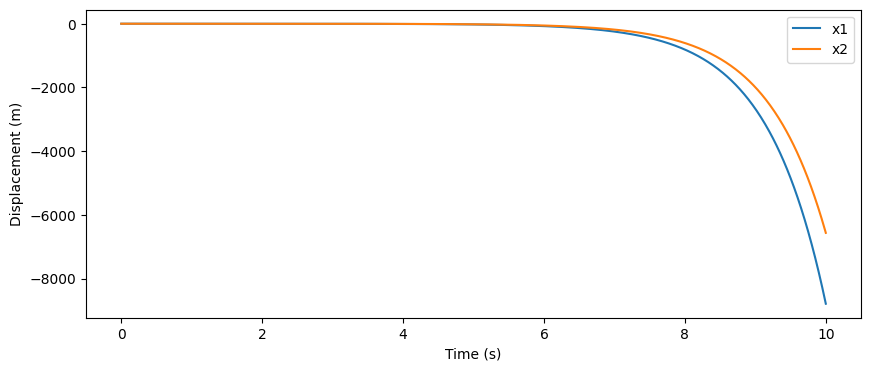

In [7]:
import numpy as np
import scipy.linalg as la
from scipy.integrate import odeint
import matplotlib.pyplot as plt

class VibrationSystem:
    def __init__(self, M, K, C):
        self.M = M  # mass matrix
        self.K = K  # stiffness matrix
        self.C = C  # damping matrix

    def simulate(self, Tmax, dT, x0, ctrl_fn=None):
        t = np.linspace(0, Tmax, int(Tmax/dT+1))

        # Define the dynamic system model
        def model(x, t):
            u = 0  # no external excitation
            if ctrl_fn:
                u = ctrl_fn(x, t)

            dxdt = np.zeros_like(x)
            dxdt[:len(x)//2] = x[len(x)//2:]
            dxdt[len(x)//2:] = la.solve(self.M, -self.C @ x[len(x)//2:] - self.K @ x[:len(x)//2] + u)
            return dxdt

        # Simulate the system
        sol = odeint(model, x0, t)

        # Plot the results
        plt.figure(figsize=(10, 4))
        plt.plot(t, sol[:, 0], label="x1")
        plt.plot(t, sol[:, 1], label="x2")
        plt.legend()
        plt.xlabel("Time (s)")
        plt.ylabel("Displacement (m)")
        plt.show()

        return sol, t

class ActiveVibrationControl:
    def __init__(self, sys, Kp, Kd):
        self.sys = sys  # vibration system
        self.Kp = Kp    # proportional gain
        self.Kd = Kd    # derivative gain

    def control(self, x, t):
        # Calculate the desired trajectory (set point) for x1 and x2
        x1d = 0
        x2d = np.sin(10 * t)

        # Calculate the error and its derivative
        e = x[:2] - np.array([x1d, x2d])
        de = x[2:] - np.array([0, 10 * np.cos(10 * t)])

        # Calculate the control force using a PD controller
        u = self.Kp @ e + self.Kd @ de

        return u

# Define the mass, stiffness, and damping matrices
M = np.array([[1, 0], [0, 2]])
K = np.array([[2, -1], [-1, 2]])
C = np.array([[0.1, 0], [0, 0.2]])

# Create the vibration system
sys = VibrationSystem(M, K, C)

# Create the active vibration control system
Kp = np.array([1, 2])
Kd = np.array([0.1, 0.2])
avc = ActiveVibrationControl(sys, Kp, Kd)

# Simulate the system with active vibration control
x0 = np.array([0.1, 0, 0, 0])
sol_avc, t = sys.simulate(10, 0.01, x0, avc.control)

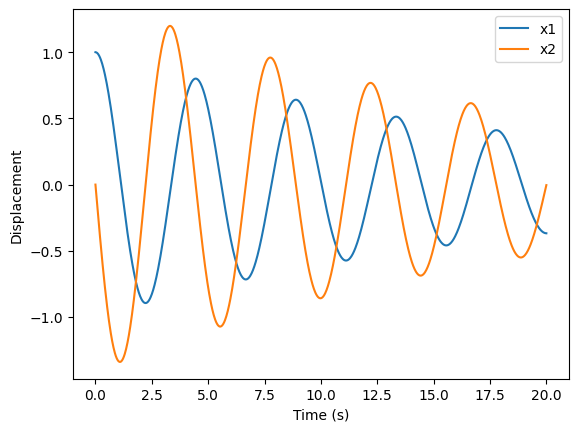

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define parameters
m = 1 # Mass
k = 2 # Spring stiffness
c = 0.1 # Damping coefficient

# Define equation of motion
def eq_of_motion(x, t, m, k, c):
    x1, x2 = x
    dx1dt = x2
    dx2dt = -(k/m)*x1 - (c/m)*x2
    return [dx1dt, dx2dt]

# Define initial conditions
x0 = [1, 0]

# Define time array
t = np.linspace(0, 20, 1000)

# Solve equation of motion
sol = odeint(eq_of_motion, x0, t, args=(m, k, c))

# Plot results
plt.plot(t, sol[:, 0], label='x1')
plt.plot(t, sol[:, 1], label='x2')
plt.xlabel('Time (s)')
plt.ylabel('Displacement')
plt.legend()
plt.show()